# Julia examples for week 2 - linear systems

## Make an interpolating polynomial

In [2]:
N = 5
t = range(0, 2*pi, length = N)
y = sin.(t)
V = hcat( [t .^ i for i in 0:N-1]...) # How does this work? evaluate just the expression in the square brackets first

5×5 Matrix{Float64}:
 1.0  0.0       0.0       0.0         0.0
 1.0  1.5708    2.4674    3.87578     6.08807
 1.0  3.14159   9.8696   31.0063     97.4091
 1.0  4.71239  22.2066  104.646     493.134
 1.0  6.28319  39.4784  248.05     1558.55

In [6]:
# loop to make V
V = zeros(Float64, N, N)
for i in 1:N
    V[:, i] = t .^ (i-1)
end
# list comprehension to make a vector, then reshape to a matrix
V = reshape([ t[j] ^ (i-1) for i in 1:N for j in 1:N ], N, N) # fills down columns first
# double loop makes a matrix without reshaping - loop over rows first
V = [ t[j] ^ (i-1) for j in 1:N, i in 1:N ]

5×5 Matrix{Float64}:
 1.0  0.0       0.0       0.0         0.0
 1.0  1.5708    2.4674    3.87578     6.08807
 1.0  3.14159   9.8696   31.0063     97.4091
 1.0  4.71239  22.2066  104.646     493.134
 1.0  6.28319  39.4784  248.05     1558.55

In [3]:
c = V\y # coefficients
using Polynomials
p = Polynomial(c)

Polynomial(1.6976527263135495*x - 0.8105694691387024*x^2 + 0.08600409182186544*x^3 - 1.2157365194180167e-17*x^4)

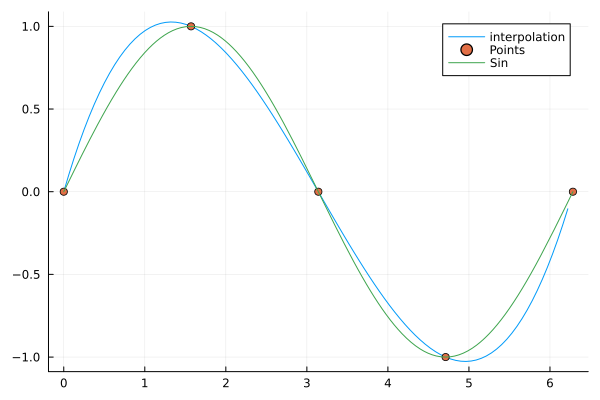

In [4]:
using Plots
plot(p, 0, 2*pi, label = "interpolation")
scatter!(t, y, label = "Points")
plot!(sin, 0, 2*pi, label = "Sin")

## Forward and backsubstitution

From textbook section [2.3](https://tobydriscoll.net/fnc-julia/linsys/linear-systems.html)

In [5]:
"""
    forwardsub(L,b)

Solve the lower triangular linear system with matrix `L` and
right-hand side vector `b`.
"""
function forwardsub(L,b)
    n = size(L,1)
    x = zeros(n)
    x[1] = b[1]/L[1,1]
    for i in 2:n
        s = sum( L[i,j]*x[j] for j in 1:i-1 )
        x[i] = ( b[i] - s ) / L[i,i]
    end
    return x
end

"""
    backsub(U,b)

Solve the upper triangular linear system with matrix `U` and
right-hand side vector `b`.
"""
function backsub(U,b)
    n = size(U,1)
    x = zeros(n)
    x[n] = b[n]/U[n,n]
    for i in n-1:-1:1
        s = sum( U[i,j]*x[j] for j in i+1:n )
        x[i] = ( b[i] - s ) / U[i,i]
    end
    return x
end

backsub

In [6]:
using LinearAlgebra
L = LowerTriangular(rand(Float64, 3, 3)) # compare tril(rand(Float64, 3, 3))
U = UpperTriangular(rand(Float64, 3, 3)) # compare triu(rand(Float64, 3, 3))
L[diagind(L)] = ones(3) # Make L have 1s on the diagonal
b = [1, 2, 3];
A = L * U; # Matrix product

Solve Ax = b by writing A = LU and solving LUx = b. 
Solve this in two steps: Lz = B then Ux = z.
Compare with solution to Ax = b.

In [7]:
z = forwardsub(L, b)

3-element Vector{Float64}:
 1.0
 1.9298239360085554
 0.7759343906004434

In [8]:
L\b # check with Julia's built-in solve

3-element Vector{Float64}:
 1.0
 1.9298239360085554
 0.7759343906004434

In [9]:
x = backsub(U, z)

3-element Vector{Float64}:
 -10.24492966667866
   2.5542493512852724
   4.993608516570113

In [10]:
U\z # check

3-element Vector{Float64}:
 -10.24492966667866
   2.5542493512852724
   4.993608516570113

In [11]:
A\b

3-element Vector{Float64}:
 -10.24492966667866
   2.5542493512852724
   4.993608516570113

In [12]:
L

3×3 LowerTriangular{Float64, Matrix{Float64}}:
 1.0         ⋅         ⋅ 
 0.0701761  1.0        ⋅ 
 0.521964   0.881998  1.0

In [13]:
U

3×3 UpperTriangular{Float64, Matrix{Float64}}:
 0.206884  0.35486   0.443189
  ⋅        0.304215  0.230852
  ⋅         ⋅        0.155386

In [14]:
sizeof(A), sizeof(L), sizeof(U)

(72, 8, 8)

In [15]:
F = lu(A)

LU{Float64, Matrix{Float64}, Vector{Int64}}
L factor:
3×3 Matrix{Float64}:
 1.0        0.0       0.0
 0.0701761  1.0       0.0
 0.521964   0.881998  1.0
U factor:
3×3 Matrix{Float64}:
 0.206884  0.35486   0.443189
 0.0       0.304215  0.230852
 0.0       0.0       0.155386

In [16]:
F.p # see also F.P, F.L, F.U

3-element Vector{Int64}:
 1
 2
 3

Inner and outer products of vectors

In [17]:
x = [1, 5, 9, -1]

4-element Vector{Int64}:
  1
  5
  9
 -1

In [18]:
y = [-1 3 0 2]

1×4 Matrix{Int64}:
 -1  3  0  2

In [19]:
x * y # outer product

4×4 Matrix{Int64}:
 -1   3  0   2
 -5  15  0  10
 -9  27  0  18
  1  -3  0  -2

In [20]:
y * x # inner (dot) product

1-element Vector{Int64}:
 12

In [21]:
x'x

108

In [22]:
y * y'

1×1 Matrix{Int64}:
 14

## Norms and matrix condition number

In [23]:
norm(b)

3.7416573867739413

In [24]:
sqrt(b'b)

3.7416573867739413

In [25]:
b

3-element Vector{Int64}:
 1
 2
 3

In [26]:
norm(b, 1)

6.0

In [27]:
norm(b, Inf)

3.0

In [28]:
norm(A)

1.052680585390495

In [29]:
sqrt(sum(A .^ 2))

1.052680585390495

In [30]:
norm(A, Inf)

0.5903252470957231

In [31]:
maximum(A)

0.5903252470957231

In [32]:
norm(A,1)

2.762374995022872

In [33]:
sum(abs.(A))

2.762374995022872

In [34]:
cond(A)

14.729727919132399

In [35]:
D = [ 1/(1+i+j) for i in 1:9, j in 1:9 ] # Hilbert matrix
# D = reshape([ 1/(1+i+j) for i in 1:9 for j in 1:9 ], 9, 9)

9×9 Matrix{Float64}:
 0.333333   0.25       0.2        …  0.111111   0.1        0.0909091
 0.25       0.2        0.166667      0.1        0.0909091  0.0833333
 0.2        0.166667   0.142857      0.0909091  0.0833333  0.0769231
 0.166667   0.142857   0.125         0.0833333  0.0769231  0.0714286
 0.142857   0.125      0.111111      0.0769231  0.0714286  0.0666667
 0.125      0.111111   0.1        …  0.0714286  0.0666667  0.0625
 0.111111   0.1        0.0909091     0.0666667  0.0625     0.0588235
 0.1        0.0909091  0.0833333     0.0625     0.0588235  0.0555556
 0.0909091  0.0833333  0.0769231     0.0588235  0.0555556  0.0526316

In [36]:
cond(D,1), cond(D,2), cond(D, Inf)

(1.3501688346908635e13, 7.075034234604596e12, 1.3501689139989568e13)

In [37]:
x = 1:9
b = D*x  
@show D\b;

D \ b = [1.0000000784660774, 1.999997828450241, 3.0000217372189124, 3.9998914005108617, 5.000306147806049, 5.9994903466760805, 7.0004967935139115, 7.999737847713127, 9.000057820588589]


In [38]:
Δx = D\b - x
@show relative_error = norm(Δx) / norm(x);

relative_error = norm(Δx) / norm(x) = 4.901181041647263e-5


In [39]:
S = A .+ A'

3×3 Matrix{Float64}:
 0.413769  0.369379  0.551175
 0.369379  0.658234  0.715494
 0.551175  0.715494  1.18065

In [40]:
isposdef(S) # possible, but not guaranteed

true

In [41]:
SPD = A' * A

3×3 Matrix{Float64}:
 0.0546729  0.127169  0.159239
 0.127169   0.439944  0.51122
 0.159239   0.51122   0.61352

In [42]:
C = cholesky(SPD)

Cholesky{Float64, Matrix{Float64}}
U factor:
3×3 UpperTriangular{Float64, Matrix{Float64}}:
 0.233822  0.543872  0.681025
  ⋅        0.379667  0.37093
  ⋅         ⋅        0.110161

In [43]:
C.L

3×3 LowerTriangular{Float64, Matrix{Float64}}:
 0.233822   ⋅         ⋅ 
 0.543872  0.379667   ⋅ 
 0.681025  0.37093   0.110161

In [44]:
C.L * C.U

3×3 Matrix{Float64}:
 0.0546729  0.127169  0.159239
 0.127169   0.439944  0.51122
 0.159239   0.51122   0.61352

## Summary

* create column, row vectors
* create matrix by combining vectors, from a function and pair of loops
* zeros, ones
* diagm, tril, triu, UpperTriangular, LowerTriangular
* rand (scalar, vector, matrix)
* matrix, vector multiply
* transpose ' (adjoint = complex conjugate transpose)
* solve \
* scalar multiply (broadcasting with .)
* subsetting (indexes, :)